# House Price Prediction

---

# Installs

In [ ]:
!pip install -q autoviz
!pip install -q -U --pre pycaret

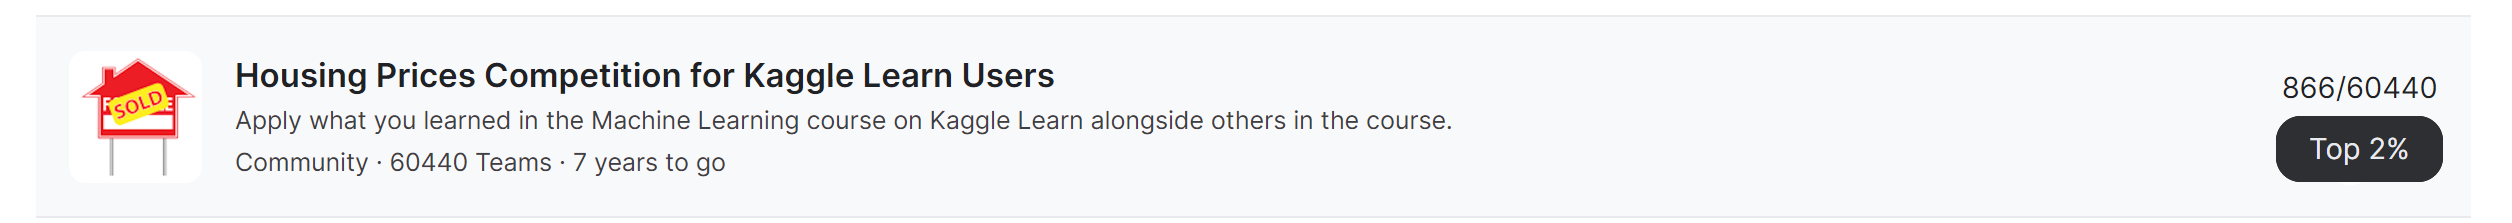

# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from autoviz.classify_method import data_cleaning_suggestions ,data_suggestions
from pycaret  import regression
from sklearn.model_selection import cross_val_score

In [ ]:
train = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')
test  = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')

In [ ]:
train.head()

In [ ]:
test.head()

# EDA

In [ ]:
data_cleaning_suggestions(train)

In [ ]:
data_cleaning_suggestions(test)

In [ ]:
# check which columns have missing values
null_cols = train.columns[train.isnull().any()]
null_cols

In [ ]:
# fill missing values with mean value for each column
for col in null_cols:
    if train[col].dtype != object:
        train[col].fillna(train[col].mean(), inplace=True)

In [ ]:
# check which columns have missing values
null_cols = train.columns[train.isnull().any()]
null_cols

In [ ]:
train.dropna(axis = 1, inplace = True)

In [ ]:
data_cleaning_suggestions(train)

In [ ]:
def detect_outliers(data):
    outlier_percents = {}
    for column in data.columns:
        if data[column].dtype != object:
            q1 = np.quantile(data[column], 0.25)
            q3 = np.quantile(data[column], 0.75)
            iqr = q3 - q1
            upper_bound = q3 + (1.5 * iqr)
            lower_bound = q1 - (1.5 * iqr)
            outliers = data[(data[column] > upper_bound) | (data[column] < lower_bound)][column]
            outlier_percentage = len(outliers) / len(data[column]) * 100
            outlier_percents[column] = outlier_percentage
            outlier_dataframe = pd.DataFrame(data = outlier_percents.values() ,index=outlier_percents.keys() ,columns=['Outlier_percentage'])
    
    return outlier_dataframe.sort_values(by = 'Outlier_percentage', ascending = False)

detect_outliers(train)

In [ ]:
train.columns

In [ ]:
# check which columns have missing values
null_cols = test.columns[test.isnull().any()]
null_cols

In [ ]:
# fill missing values with mean value for each column
for col in null_cols:
    if test[col].dtype != object:
        test[col].fillna(test[col].mean(), inplace=True)

In [ ]:
# check which columns have missing values
null_cols = test.columns[test.isnull().any()]
null_cols

In [ ]:
test.dropna(axis = 1, inplace = True)

In [ ]:
train.shape

In [ ]:
test.shape

# Correlation

In [ ]:
plt.figure(figsize=(50,30))
sns.heatmap(train.corr(),annot=True)

In [ ]:
X = train.drop('SalePrice', axis = 1)
y = train['SalePrice']

# Regressor Model Comparision

In [ ]:
regression.setup(X,target=y ,session_id=42)

In [ ]:
regression.compare_models()

In [ ]:
train.dtypes

# CatBoost Model

In [ ]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from pycaret.regression import *

In [ ]:
model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6)

In [ ]:
obj_cols = train.select_dtypes(include=['object']).columns
obj_cols

In [ ]:
model.fit(get_config('X'), get_config('y'), cat_features=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition'])

In [ ]:
data = train.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = train.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

In [ ]:
cat = create_model('catboost')

In [ ]:
#trained model object is stored in the variable 'dt'. 
print(cat)

In [ ]:
plot_model(cat)

In [ ]:
plot_model(cat, plot = 'error')

In [ ]:
plot_model(cat, plot='feature')

In [ ]:
evaluate_model(cat)

# Predictions

In [ ]:
predict_model(cat)

# Predictions on Unseen Data

In [ ]:
unseen_predictions = predict_model(cat, data=data_unseen)
unseen_predictions.head()

In [ ]:
unseen_predictions.shape

In [ ]:
train.shape

In [ ]:
test = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')

In [ ]:
test.shape

In [ ]:
train_cols = set(train.columns)
test_cols = set(test.columns)

# Find columns in test that are not in train
extra_cols = test_cols - train_cols

# Remove extra columns from test
test = test.drop(extra_cols, axis=1)

In [ ]:
test.shape

In [ ]:
train.shape

# Predictions on Test Data

In [ ]:
testpreds = predict_model(cat, data=test)
testpreds

In [ ]:
pred_cols = set(testpreds.columns)
test_cols = set(test.columns)

# Find columns in test that are not in train
extra_cols = pred_cols - test_cols
extra_cols

# Submission

In [ ]:
sub = pd.read_csv('/kaggle/input/home-data-for-ml-course/sample_submission.csv')
sub.shape

In [ ]:
sub.drop('SalePrice', axis = 1, inplace = True)

In [ ]:
# Separate column from source dataset
column_to_move = testpreds.pop('prediction_label')

# Add column to destination dataset
sub['SalePrice'] = column_to_move

In [ ]:
sub

In [ ]:
sub.to_csv('submission.csv' ,index = False)

In [ ]:
sub = pd.read_csv('/kaggle/working/submission.csv')
sub

# Thank You - Do Upvote

---
